# Characteristics of Chronic Illness in Flaredown Users
## by Marc Hilty

## Investigation Overview

This project is part of Udacity's Data Analyst Nanodegree Programm. <br> The dataset was aquired from kaggle.com. They launched an app that tracks chronic illness symptoms and provided the data I use in this project. And has more than 3 million rows that would not be usable using non programmatic approaches. Sources are marked with (n) and linked under Sources at the end of the notebook.<br>
During investigation I mainly focus on characteristics of all app users. Since the data is very heterogenetic it is hard to focus on one disease. Nevertheless I will also show information about one specific condition.

## Dataset Overview

Flaredown allows users to track their individual set of conditions, symptoms and treatments. They can add severity of symptoms, different treatments, weather conditions or food they recently consumed. These "trackables" are stored in "check_in" dates. There are more than three million entries in this dataset. The data was cleaned before plotting. The individual cleaning steps can be seen in the jupyter notebook "". Datapoints have been removed due to missing or impossible information (e.g. negative age). 

In [1]:
import requests
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

% matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')

## Age and Gender Distribution
>These two aspects are key to understand the dataset. We want as much information about the users as possible to make valid conclusions about their conditions. A barplot of the gender distribution shows that mainly women use the app. A histogram shows the age distribution. It is skewed to the left. The first few entries under the age of ten are probably outliers, though we cannot tell if it is not parents tracking symptoms for their kids. I chose to keep this information since it is unlikely but still possible. 

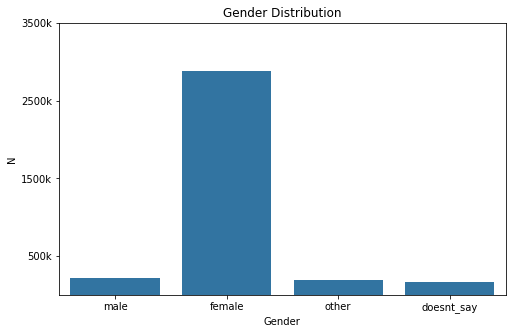

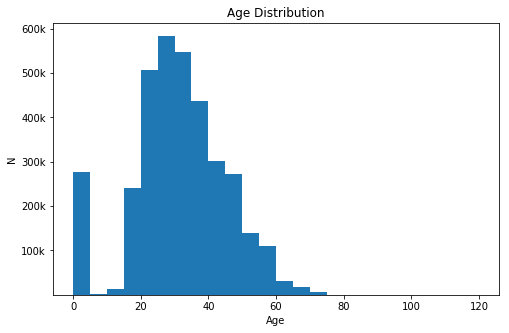

In [8]:
base_color = sns.color_palette()[0]

plt.figure(figsize = (8, 5))
sns.countplot(data = df_clean, x = 'sex', color = base_color);
plt.xlabel('Gender')
plt.yticks([500000, 1500000, 2500000, 3500000], ['500k', '1500k', '2500k', '3500k'])
plt.ylabel('N')
plt.title('Gender Distribution')

plt.subplot()
bins = np.arange(0, df_clean['age'].max() + 5, 5)
plt.figure(figsize = (8, 5))
plt.hist(data = df_clean, x = 'age', bins = bins)
plt.xlabel('Age')
plt.ylabel('N')
plt.yticks([100000, 200000, 300000, 400000, 500000, 600000], ['100k', '200k', '300k', '400k', '500k', '600k'])
plt.title('Age Distribution')
plt.show();

## Top 25 most common conditions
>This barplot is generated using the 25 most common entries for conditions. There are many typos in the dataset and it is likely that some datapoints are missing due to typing mistakes by the users.

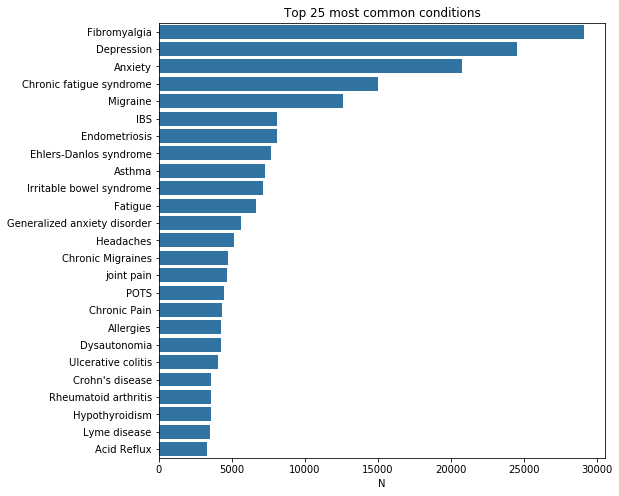

In [9]:
x_value = df_clean[df_clean.trackable_type == "Condition"].trackable_name.value_counts().iloc[0:25]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.values, y = x_value.index, color = base_color)
plt.xlabel('N')
plt.title('Top 25 most common conditions')
plt.show()

## Top 25 most commonly used treatments
>It is interesting to see what kind of drugs and supplements this huge population uses. Again it is very likely that some typos lead to missing datapoints. Nevertheless the barplot should still be a viable representation.

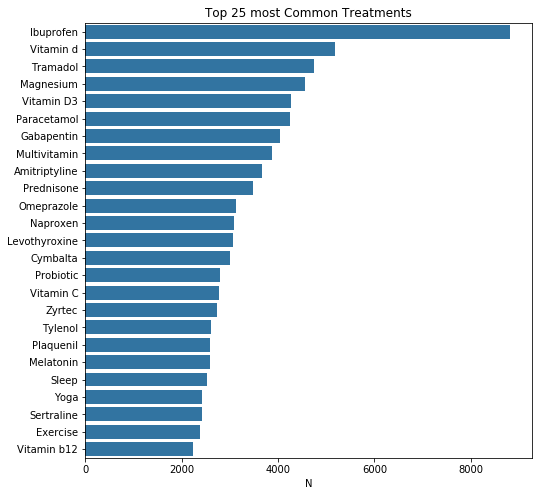

In [10]:
x_value = df_clean[df_clean.trackable_type == "Treatment"].trackable_name.value_counts().iloc[0:25]

plt.figure(figsize = (8, 8))
sns.barplot(x = x_value.values, y = x_value.index, color = base_color)
plt.xlabel('N')
plt.title("Top 25 most Common Treatments")
plt.show();

## Age and Condition Activity Score
>Age is a main risk for develepoment of chronic diseases. This heatmap with a sequential colormap compares the different disease activity score from 0 to 4 to the their respective age. We can see that there seems to be no connection between age and condition activity. There is a datagap around the age of 10. Also keep in mind that most app users are under the age of sixty! This screws with the expectation of higher activity the older the patient.

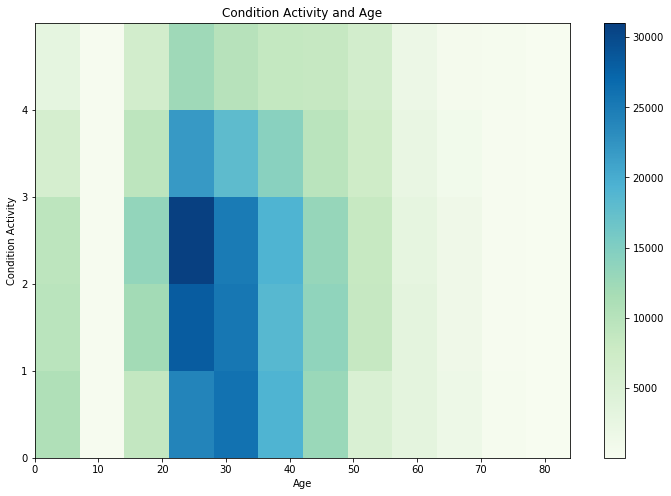

In [11]:
filter_set = df_clean[df_clean['trackable_type'] == 'Condition']
filter_set['trackable_value'] = filter_set['trackable_value'].astype(int)

bins_x = np.arange(0, 80 + 7, 7)
bins_y = np.arange(0, 5+1, 1)

plt.figure(figsize = (12, 8))
plt.hist2d(data = filter_set, x = 'age', y = 'trackable_value', bins = [bins_x, bins_y], cmap = 'GnBu')
plt.colorbar()
plt.yticks([0, 1, 2, 3, 4])
plt.xlabel('Age')
plt.ylabel('Condition Activity')
plt.title('Condition Activity and Age')
plt.show()

## Age and Pain Index
>We do the same as above but with the pain scale users apply to their symptoms. Again there is no correlation between these variables. 

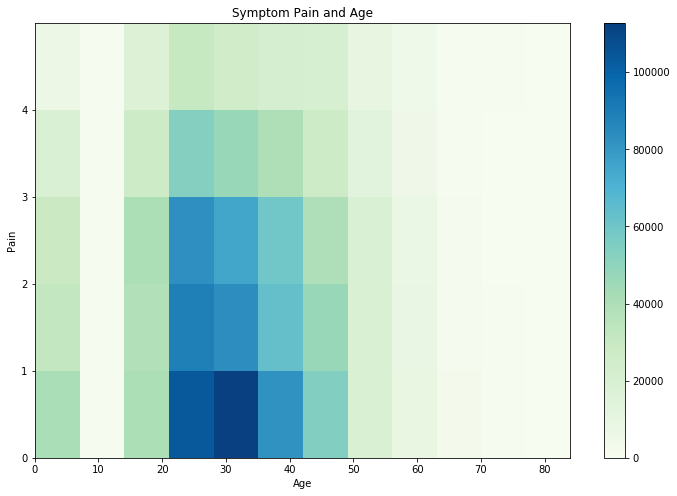

In [12]:
filter_set = df_clean[df_clean['trackable_type'] == 'Symptom']
filter_set['trackable_value'] = filter_set['trackable_value'].astype(int)

bins_x = np.arange(0, 80 + 7, 7)
bins_y = np.arange(0, 5+1, 1)

plt.figure(figsize = (12, 8))
plt.hist2d(data = filter_set, x = 'age', y = 'trackable_value', bins = [bins_x, bins_y], cmap = 'GnBu')
plt.colorbar()
plt.yticks([0, 1, 2, 3, 4])
plt.xlabel('Age')
plt.ylabel('Pain')
plt.title('Symptom Pain and Age')
plt.show()

## Mean Pain Index Since 2016
>This timeline shows us how all users respond to pain over the course of years. Even though the app was launched 2013 the plot start at 2016. Before there weren't enough users to properly show a trend. There is no change when looking at all users.

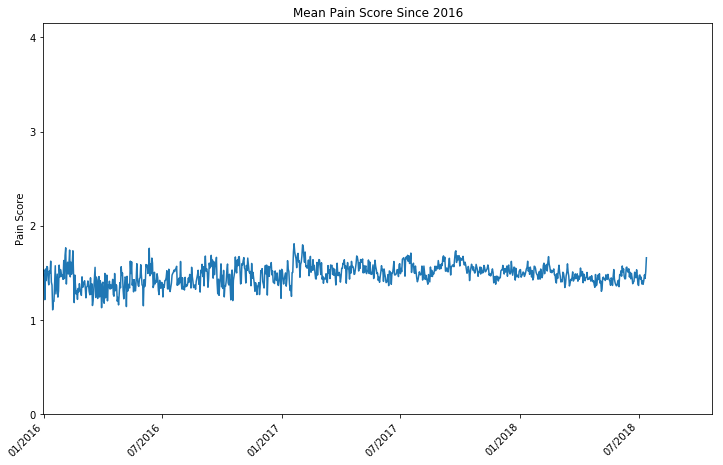

In [13]:
df_clean['checkin_date'] = pd.to_datetime(df_clean['checkin_date'])

filter_set = df_clean[df_clean['trackable_type'] == 'Symptom']
filter_set['trackable_value'] = filter_set['trackable_value'].astype(int)
filter_set = filter_set['trackable_value'].groupby(filter_set['checkin_date']).mean()


ax = filter_set.plot.line(x = 'checkin_date', y = 'trackable_value', figsize = (12, 8))
ax.set_xlim(left = pd.to_datetime("2015-12-31"))
ax.set_xlabel("")
ax.set_xticks(['2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07'])
ax.set_xticklabels(['01/2016', '07/2016', '01/2017', '07/2017', '01/2018', '07/2018'], rotation = 45)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_ylabel('Pain Score')
ax.set_title('Mean Pain Score Since 2016')
plt.show()

## Mean Pain Index for Fibromyalgia Patients since 2016
>Compared to all users patients suffering from fibromyalgia show a trend. We can tell that during winter months the average pain index is approximately .3 higher than during the rest of the year.

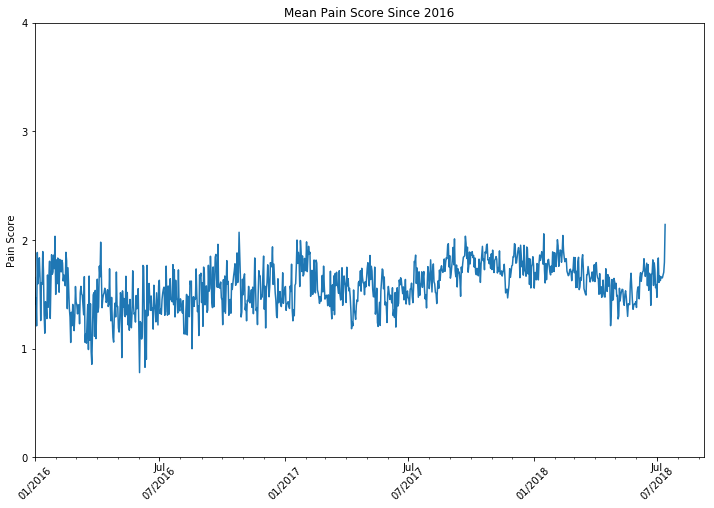

In [14]:
user_fibro = df_clean.loc[df_clean['trackable_name'] == 'Fibromyalgia', 'user_id']
user_fibro = user_fibro.drop_duplicates().values
df_fibro = df_clean.loc[df_clean['user_id'].isin(user_fibro)]

filter_set = df_fibro[df_fibro['trackable_type'] == 'Symptom']
filter_set['trackable_value'] = filter_set['trackable_value'].astype(int)
filter_set = filter_set['trackable_value'].groupby(filter_set['checkin_date']).mean()

ax = filter_set.plot.line(x = 'checkin_date', y = 'trackable_value', figsize = (12, 8))
ax.set_xlim(left = pd.to_datetime("2015-12-31"))
ax.set_xlabel("")
ax.set_xticks(['2016-01', '2016-07', '2017-01', '2017-07', '2018-01', '2018-07'])
ax.set_xticklabels(['01/2016', '07/2016', '01/2017', '07/2017', '01/2018', '07/2018'], rotation = 45)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_ylabel('Pain Score')
ax.set_title('Mean Pain Score Since 2016');